# Project Tumor Trace: MRI-Based AI for Breast Cancer Detection

## Loading libraries 

In [2]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets , transforms
import torchvision.models as models
from PIL import Image
import torchvision.transforms as transforms

## Data Transformation Function for Augmented and Original Datasets

In [13]:
# Resizing images
transformAug = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.CenterCrop(224),
    transforms.ColorJitter(brightness=2),
    transforms.RandomResizedCrop(size=(224, 224), antialias=True),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
])


In [14]:
train_dataset = dataset = datasets.ImageFolder('./clasification-roi/train/', transform=transformAug)
test_dataset = dataset = datasets.ImageFolder('./clasification-roi/test/', transform=transform)
val_dataset = dataset = datasets.ImageFolder('./clasification-roi/val/', transform=transform)

train_aug_dataset = dataset = datasets.ImageFolder('./clasification-roi/train/', transform=transformAug)
test_aug_dataset = dataset = datasets.ImageFolder('./clasification-roi/test/', transform=transform)
val_aug_dataset = dataset = datasets.ImageFolder('./clasification-roi/val/', transform=transform)

In [16]:
batch_size = 32

## Loading data

In [17]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

trainloaderAug = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloaderAug = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
valloaderAug = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

## Counting number of images

In [18]:
from collections import Counter
print("Train Dataset Class Distribution:")
print(dict(Counter(sample_tup[1] for sample_tup in train_dataset.imgs)))

print("Test Dataset Class Distribution:")
print(dict(Counter(sample_tup[1] for sample_tup in test_dataset.imgs)))

print("Val Dataset Class Distribution:")
print(dict(Counter(sample_tup[1] for sample_tup in val_dataset.imgs)))


Train Dataset Class Distribution:
{0: 5559, 1: 14875}
Test Dataset Class Distribution:
{0: 1938, 1: 4913}
Val Dataset Class Distribution:
{0: 408, 1: 1581}


## Displaying sample images

In [19]:
classes = ('Melignant', 'Benign')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


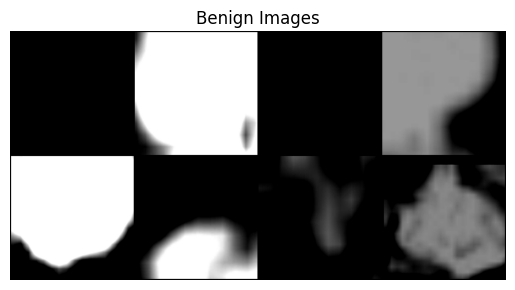

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


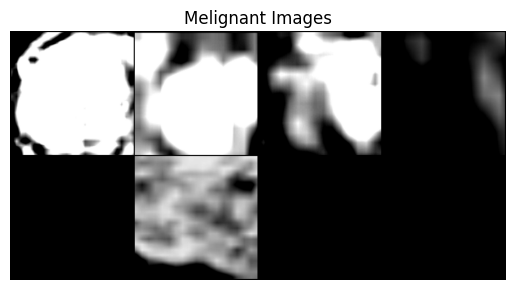

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

def show_images_by_class(data_loader, classes, target_classes=['Benign', 'Melignant'], num_images=8):
    dataiter = iter(data_loader)
    images, labels = next(dataiter)

    benign_images = []
    melignant_images = []

    for i in range(len(labels)):
        if classes[labels[i]] == target_classes[0]:
            benign_images.append(images[i])
        elif classes[labels[i]] == target_classes[1]:
            melignant_images.append(images[i])

    if benign_images:
        benign_grid = torchvision.utils.make_grid(torch.stack(benign_images[:num_images]), nrow=4)
        imshow(benign_grid, title='Benign Images')

    if melignant_images:
        melignant_grid = torchvision.utils.make_grid(torch.stack(melignant_images[:num_images]), nrow=4)
        imshow(melignant_grid, title='Melignant Images')

show_images_by_class(trainloader, classes, target_classes=['Benign', 'Melignant'], num_images=8)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


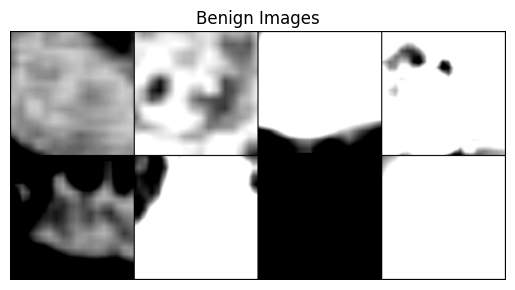

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


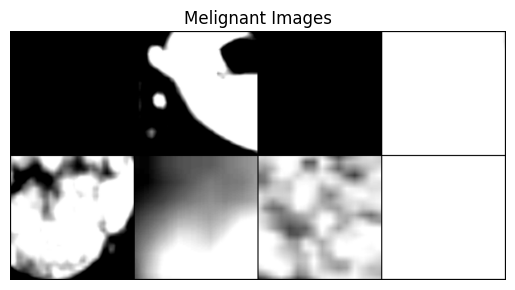

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

def show_images_by_class(data_loader, classes, target_classes=['Benign', 'Melignant'], num_images=8):
    dataiter = iter(data_loader)
    images, labels = next(dataiter)

    benign_images = []
    melignant_images = []

    for i in range(len(labels)):
        if classes[labels[i]] == target_classes[0]:
            benign_images.append(images[i])
        elif classes[labels[i]] == target_classes[1]:
            melignant_images.append(images[i])

    if benign_images:
        benign_grid = torchvision.utils.make_grid(torch.stack(benign_images[:num_images]), nrow=4)
        imshow(benign_grid, title='Benign Images')

    if melignant_images:
        melignant_grid = torchvision.utils.make_grid(torch.stack(melignant_images[:num_images]), nrow=4)
        imshow(melignant_grid, title='Melignant Images')

show_images_by_class(trainloaderAug, classes, target_classes=['Benign', 'Melignant'], num_images=8)


## VGG 16 Model

In [32]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

Using cache found in C:\Users\kumud/.cache\torch\hub\pytorch_vision_v0.10.0


In [33]:
pip install Pillow

In [34]:
input_image = Image.open('./clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg').convert('RGB')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

model.eval()  
with torch.no_grad():
    output = model(input_batch)


In [35]:
print(output)

tensor([[ 1.7722e-01,  2.8148e+00, -7.6697e-01,  2.8151e-01, -3.1437e-01,
          2.3726e+00, -3.5673e+00, -1.6575e+00, -2.1122e+00, -2.0490e+00,
          1.7995e+00, -3.0830e+00, -2.9945e+00, -1.8305e+00, -2.1870e+00,
         -1.9123e+00, -1.3854e+00, -2.7219e+00, -2.4119e+00, -2.4103e+00,
         -1.3219e+00, -1.7210e+00, -2.2531e+00, -7.6893e-01, -2.1583e+00,
         -4.6211e-01,  1.4578e+00,  4.3685e-01,  1.2775e+00,  3.9830e+00,
         -1.7718e+00,  1.3678e+00,  1.4397e+00, -5.0776e-01,  4.7667e-01,
         -8.5749e-01, -1.0462e+00, -4.2227e+00,  1.7013e+00, -3.7241e-01,
         -5.8305e-01,  4.2426e-01, -1.2109e-01,  1.9852e+00, -3.7804e-01,
         -5.6655e-01, -1.5815e+00,  2.1921e+00, -1.6165e+00, -3.6963e+00,
         -3.6403e+00,  1.7829e+00,  1.4911e+00,  5.0929e-01, -1.7688e-01,
         -9.5111e-01, -6.8134e-01, -2.3637e+00, -4.2169e+00,  4.3030e+00,
          1.5067e+00, -1.2390e+00,  1.1251e+00,  2.7263e+00,  3.1482e+00,
         -5.5740e-02,  2.5862e+00, -2.

In [36]:
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([9.1300e-05, 1.2762e-03, 3.5515e-05, 1.0133e-04, 5.5844e-05, 8.2014e-04,
        2.1590e-06, 1.4576e-05, 9.2507e-06, 9.8543e-06, 4.6239e-04, 3.5041e-06,
        3.8285e-06, 1.2261e-05, 8.5846e-06, 1.1298e-05, 1.9135e-05, 5.0282e-06,
        6.8552e-06, 6.8662e-06, 2.0389e-05, 1.3680e-05, 8.0348e-06, 3.5445e-05,
        8.8342e-06, 4.8174e-05, 3.2857e-04, 1.1836e-04, 2.7437e-04, 4.1050e-03,
        1.3002e-05, 3.0028e-04, 3.2265e-04, 4.6024e-05, 1.2317e-04, 3.2441e-05,
        2.6861e-05, 1.1210e-06, 4.1913e-04, 5.2695e-05, 4.2686e-05, 1.1688e-04,
        6.7751e-05, 5.5676e-04, 5.2399e-05, 4.3396e-05, 1.5728e-05, 6.8470e-04,
        1.5186e-05, 1.8976e-06, 2.0071e-06, 4.5478e-04, 3.3967e-04, 1.2726e-04,
        6.4074e-05, 2.9542e-05, 3.8690e-05, 7.1937e-06, 1.1275e-06, 5.6527e-03,
        3.4501e-04, 2.2151e-05, 2.3556e-04, 1.1682e-03, 1.7814e-03, 7.2326e-05,
        1.0154e-03, 6.0671e-06, 1.9004e-03, 2.0687e-05, 1.9973e-05, 3.3435e-04,
        4.5844e-05, 4.8916e-03, 3.9988e-

## Plot the pixel value range from an image

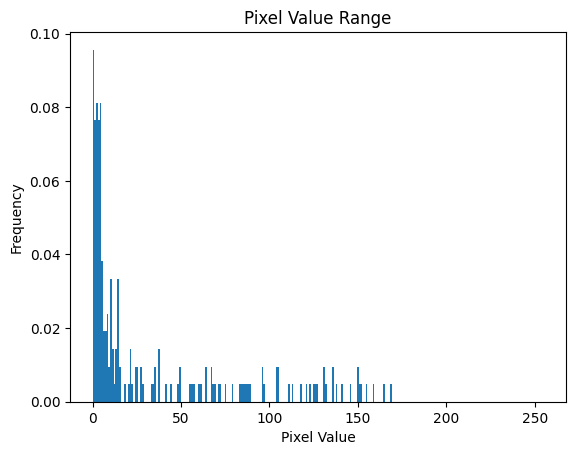

In [22]:
image_path = './clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'
image = Image.open(image_path).convert('L')
image_array = np.array(image)

plt.hist(image_array.ravel(), bins=256, range=(0, 255), density=True)
plt.title('Pixel Value Range')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

## Ploting HOG visualizatio graph of Image

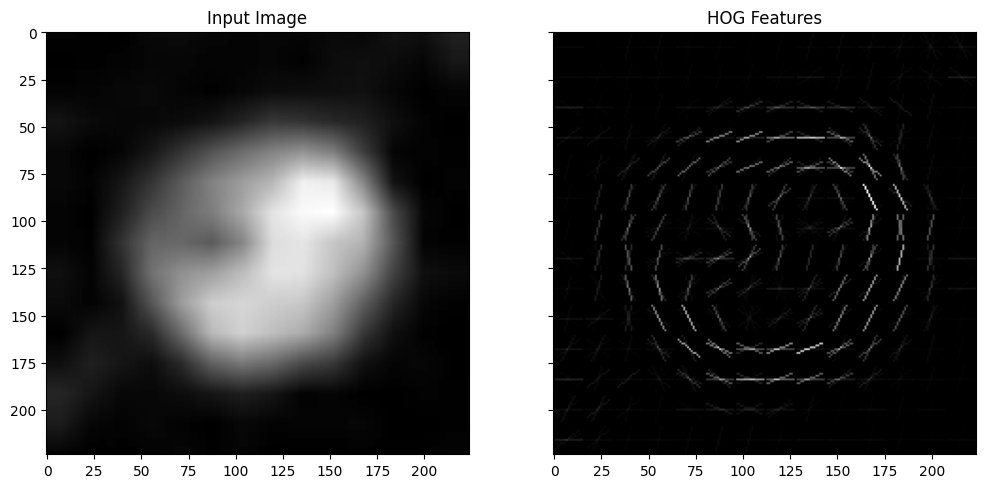

In [23]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
from PIL import Image

image_path = './clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'
input_image = Image.open(image_path).convert('L')
preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
image_tensor = preprocess(input_image)
image_numpy = image_tensor.numpy().squeeze()

hog_features, hog_image = hog(image_numpy, pixels_per_cell=(16, 16),
                              cells_per_block=(2, 2), visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax[0].imshow(image_numpy, cmap=plt.cm.gray)
ax[0].set_title('Input Image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax[1].set_title('HOG Features')

plt.show()


## Sobel Operator

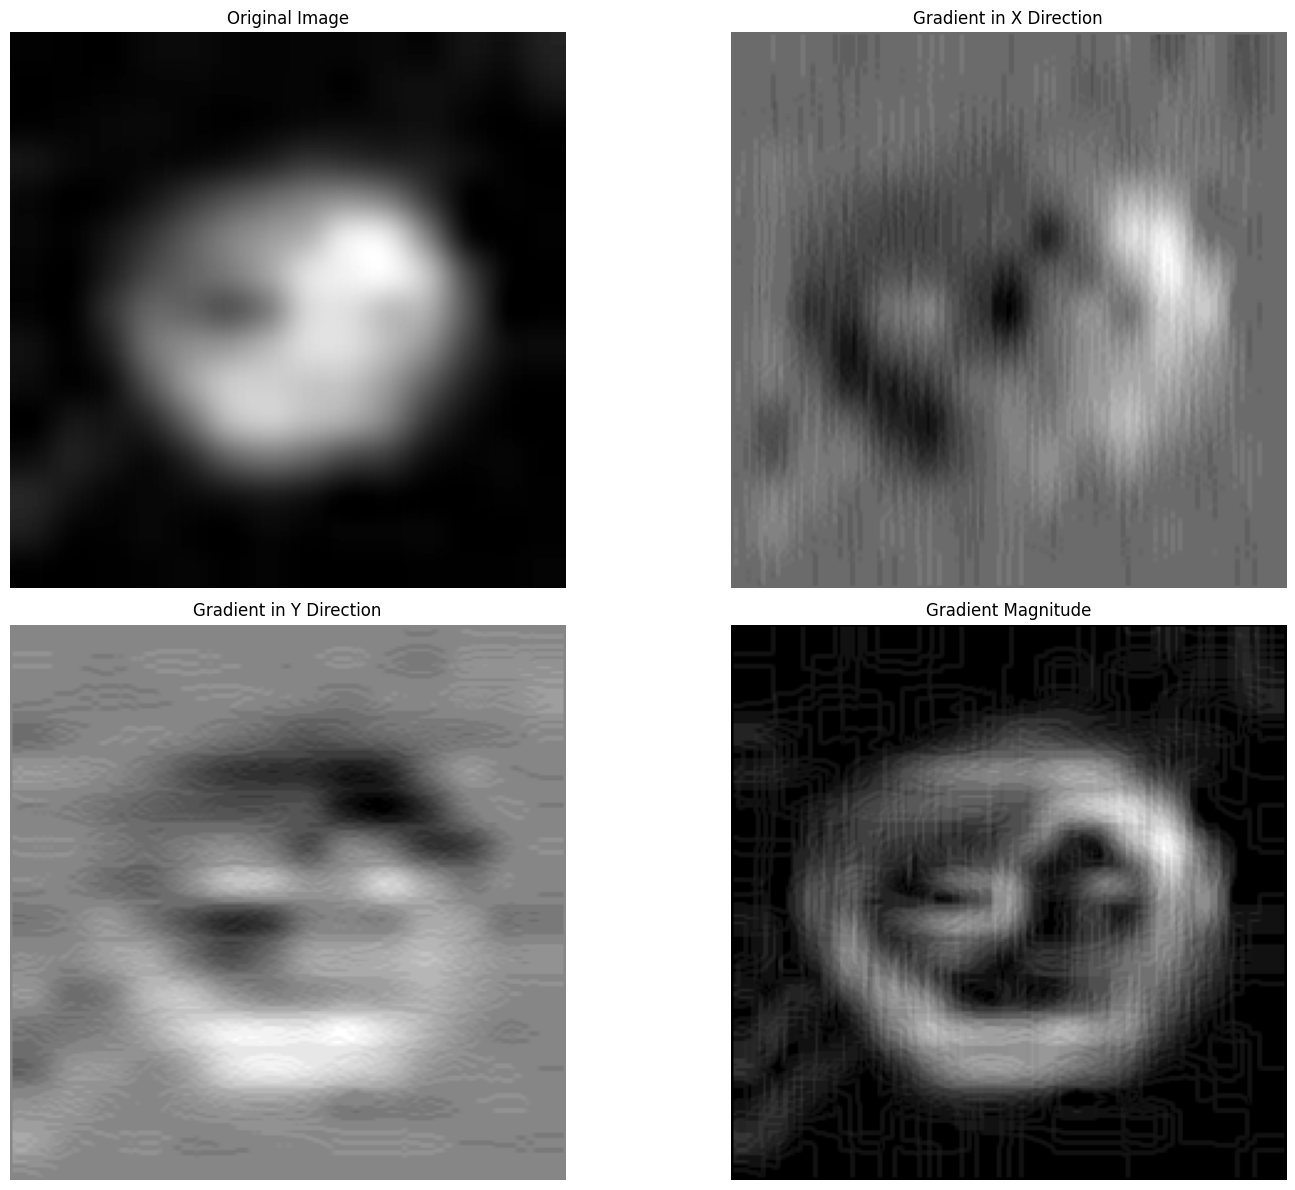

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def sobel_operator(image_path):
    image = Image.open(image_path).convert('L').resize((224, 224))
    img_array = np.array(image)

    sobel_x = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])

    sobel_y = np.array([[1, 2, 1],
                         [0, 0, 0],
                         [-1, -2, -1]])

    rows, cols = img_array.shape
    Gx = np.zeros(img_array.shape)
    Gy = np.zeros(img_array.shape)

    for i in range(1, rows-1):
        for j in range(1, cols-1):
            region = img_array[i-1:i+2, j-1:j+2]
            Gx[i, j] = np.sum(sobel_x * region)
            Gy[i, j] = np.sum(sobel_y * region)

    G = np.sqrt(Gx**2 + Gy**2)
    G = (G / G.max()) * 255
    G = G.astype(np.uint8)

    plt.figure(figsize=(16, 12))
    
    plt.subplot(2, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(Gx, cmap='gray')
    plt.title('Gradient in X Direction')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(Gy, cmap='gray')
    plt.title('Gradient in Y Direction')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(G, cmap='gray')
    plt.title('Gradient Magnitude')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

sobel_operator('./clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg')


## Local Binary Pattern 

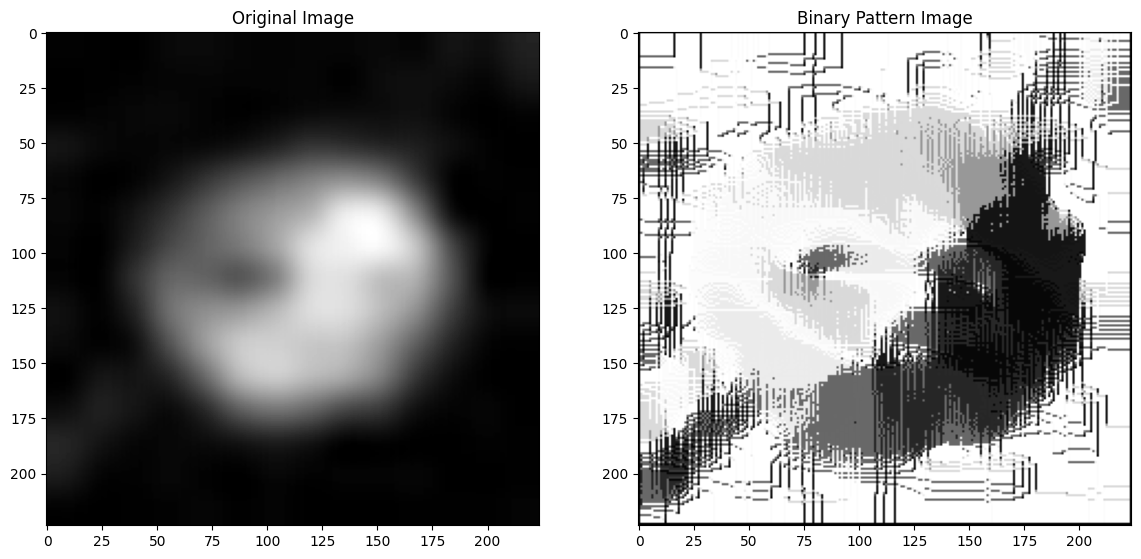

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def sobel_operators(image_path):
    image = Image.open(image_path).convert('L').resize((224, 224))
    img_array = np.array(image)
    
    rows, cols = img_array.shape
    G = np.zeros(img_array.shape)
    
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            surr = img_array[i-1:i+2, j-1:j+2].T.flatten()
            skip = 4
            binary_pattern = 0
            
            for ind in range(9):
                if ind == skip:
                    continue
                if surr[ind] >= surr[skip]:
                    binary_pattern += 2**ind
            
            G[i, j] = binary_pattern

    G = (G / G.max()) * 255
    
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(G, cmap='gray')
    plt.title('Binary Pattern Image')

    plt.show()

sobel_operators('./clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg')


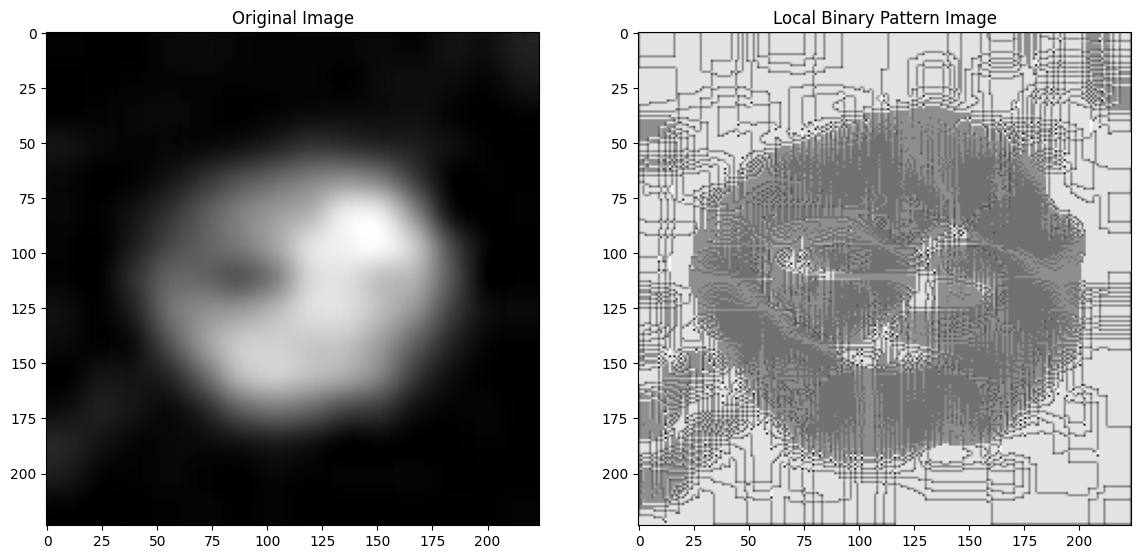

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.feature import local_binary_pattern

def sobel_operators(image_path):
    image = Image.open(image_path).convert('L').resize((224, 224))
    img_array = np.array(image)

    radius = 1
    n_points = 8 * radius

    lbp = local_binary_pattern(img_array, n_points, radius, method='uniform')
    lbp_normalized = (lbp / lbp.max()) * 255

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(lbp_normalized, cmap='gray')
    plt.title('Local Binary Pattern Image')

    plt.show()

    return img_array, lbp_normalized

# Example usage
image_path = './clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'
original_image, lbp_image = sobel_operators(image_path)


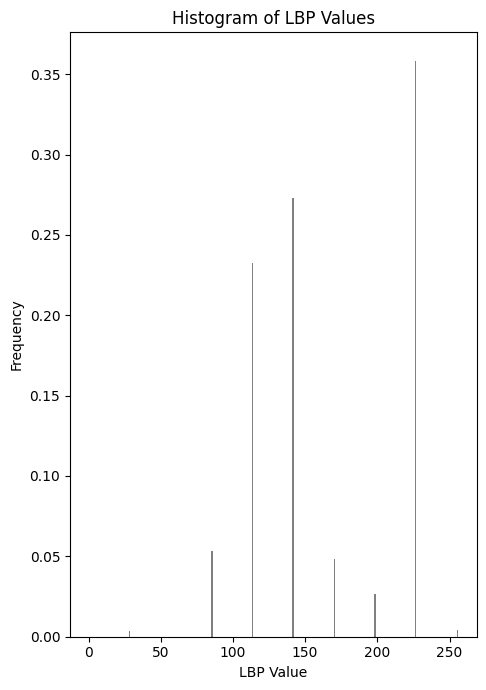

In [51]:
import matplotlib.pyplot as plt

def plot_lbp_and_histogram(original_image, lbp_image):
    plt.figure(figsize=(14, 7))
    n_bins = int(lbp_image.max() + 1)
    plt.subplot(1, 3, 3)
    plt.hist(lbp_image.ravel(), bins=n_bins, range=(0, n_bins), density=True, color="gray")
    plt.title("Histogram of LBP Values")
    plt.xlabel("LBP Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Plot the results
plot_lbp_and_histogram(original_image, lbp_image)


## MVM-LBP - Mean-Variance-Median Local Binary Pattern

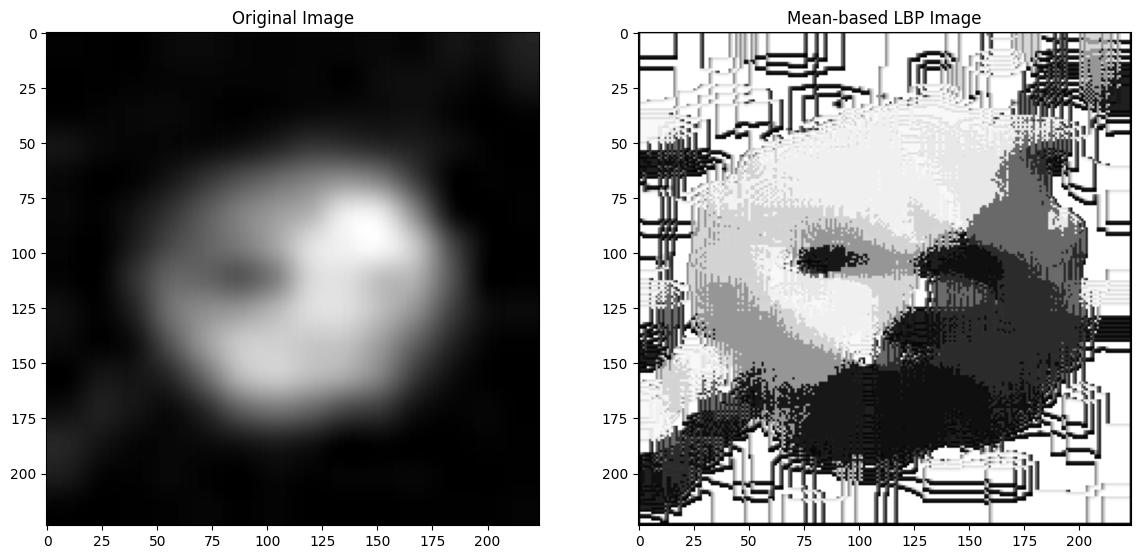

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def mean_based_lbp(image_path):
    image = Image.open(image_path).convert('L').resize((224, 224))
    img_array = np.array(image)
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            mean_value = (np.sum(neighborhood) - center_pixel) / 8
            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= mean_value).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()
    
    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255
    
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image_normalized, cmap='gray')
    plt.title('Mean-based LBP Image')
    plt.show()

mean_based_lbp('./clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg')


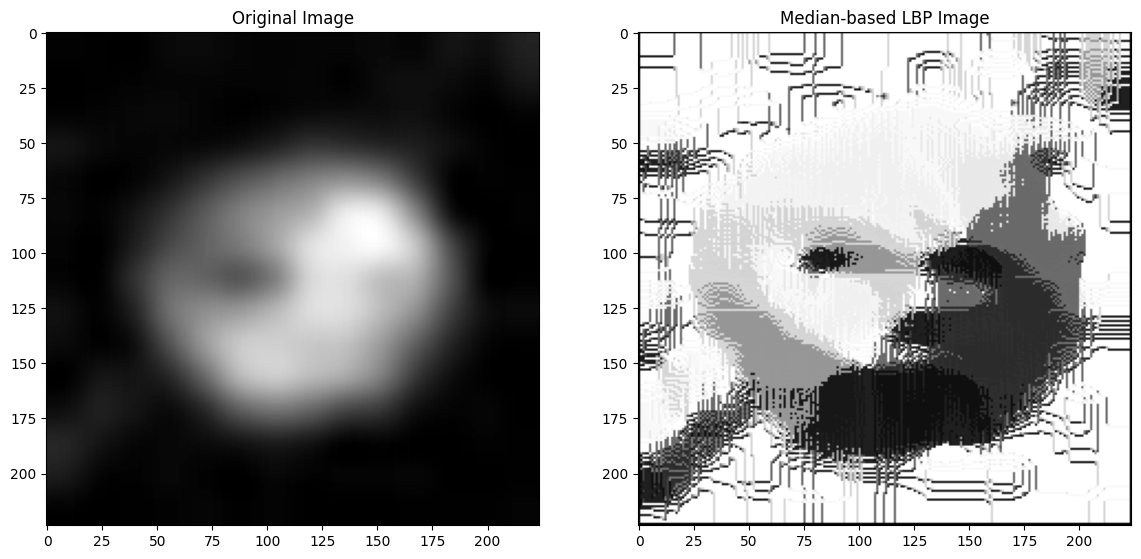

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def median_based_lbp(image_path):
    image = Image.open(image_path).convert('L').resize((224, 224))
    img_array = np.array(image)
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            median_value = np.median(neighborhood.flatten())
            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= median_value).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()
    
    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255
    
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image_normalized, cmap='gray')
    plt.title('Median-based LBP Image')
    plt.show()

median_based_lbp('./clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg')


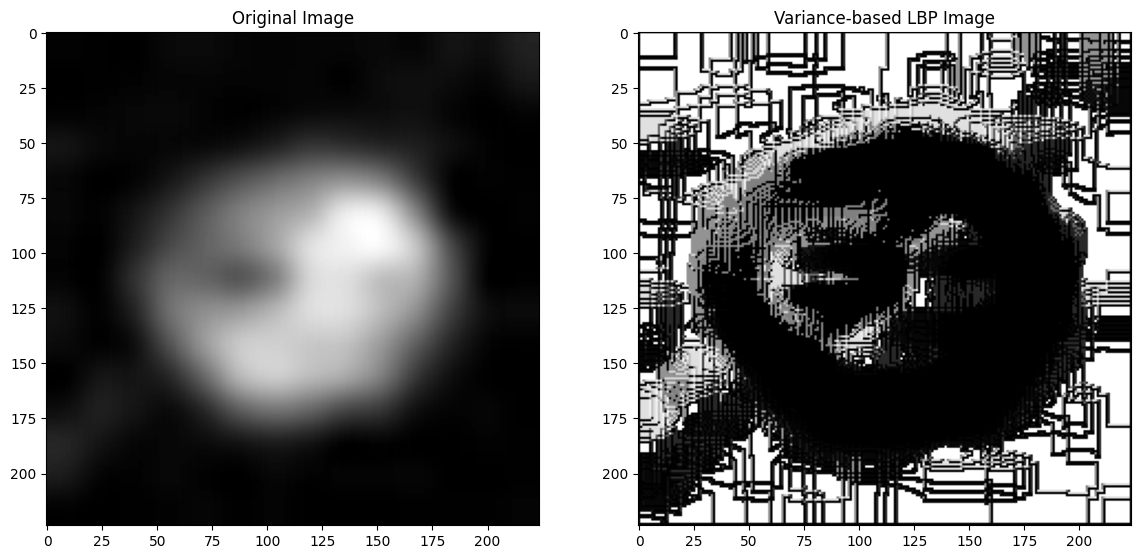

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def variance_based_lbp(image_path):
    image = Image.open(image_path).convert('L').resize((224, 224))
    img_array = np.array(image)
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            variance_value = np.var(neighborhood.flatten())
            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= center_pixel + variance_value).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()
    
    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image_normalized, cmap='gray')
    plt.title('Variance-based LBP Image')
    plt.show()

variance_based_lbp('./clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg')


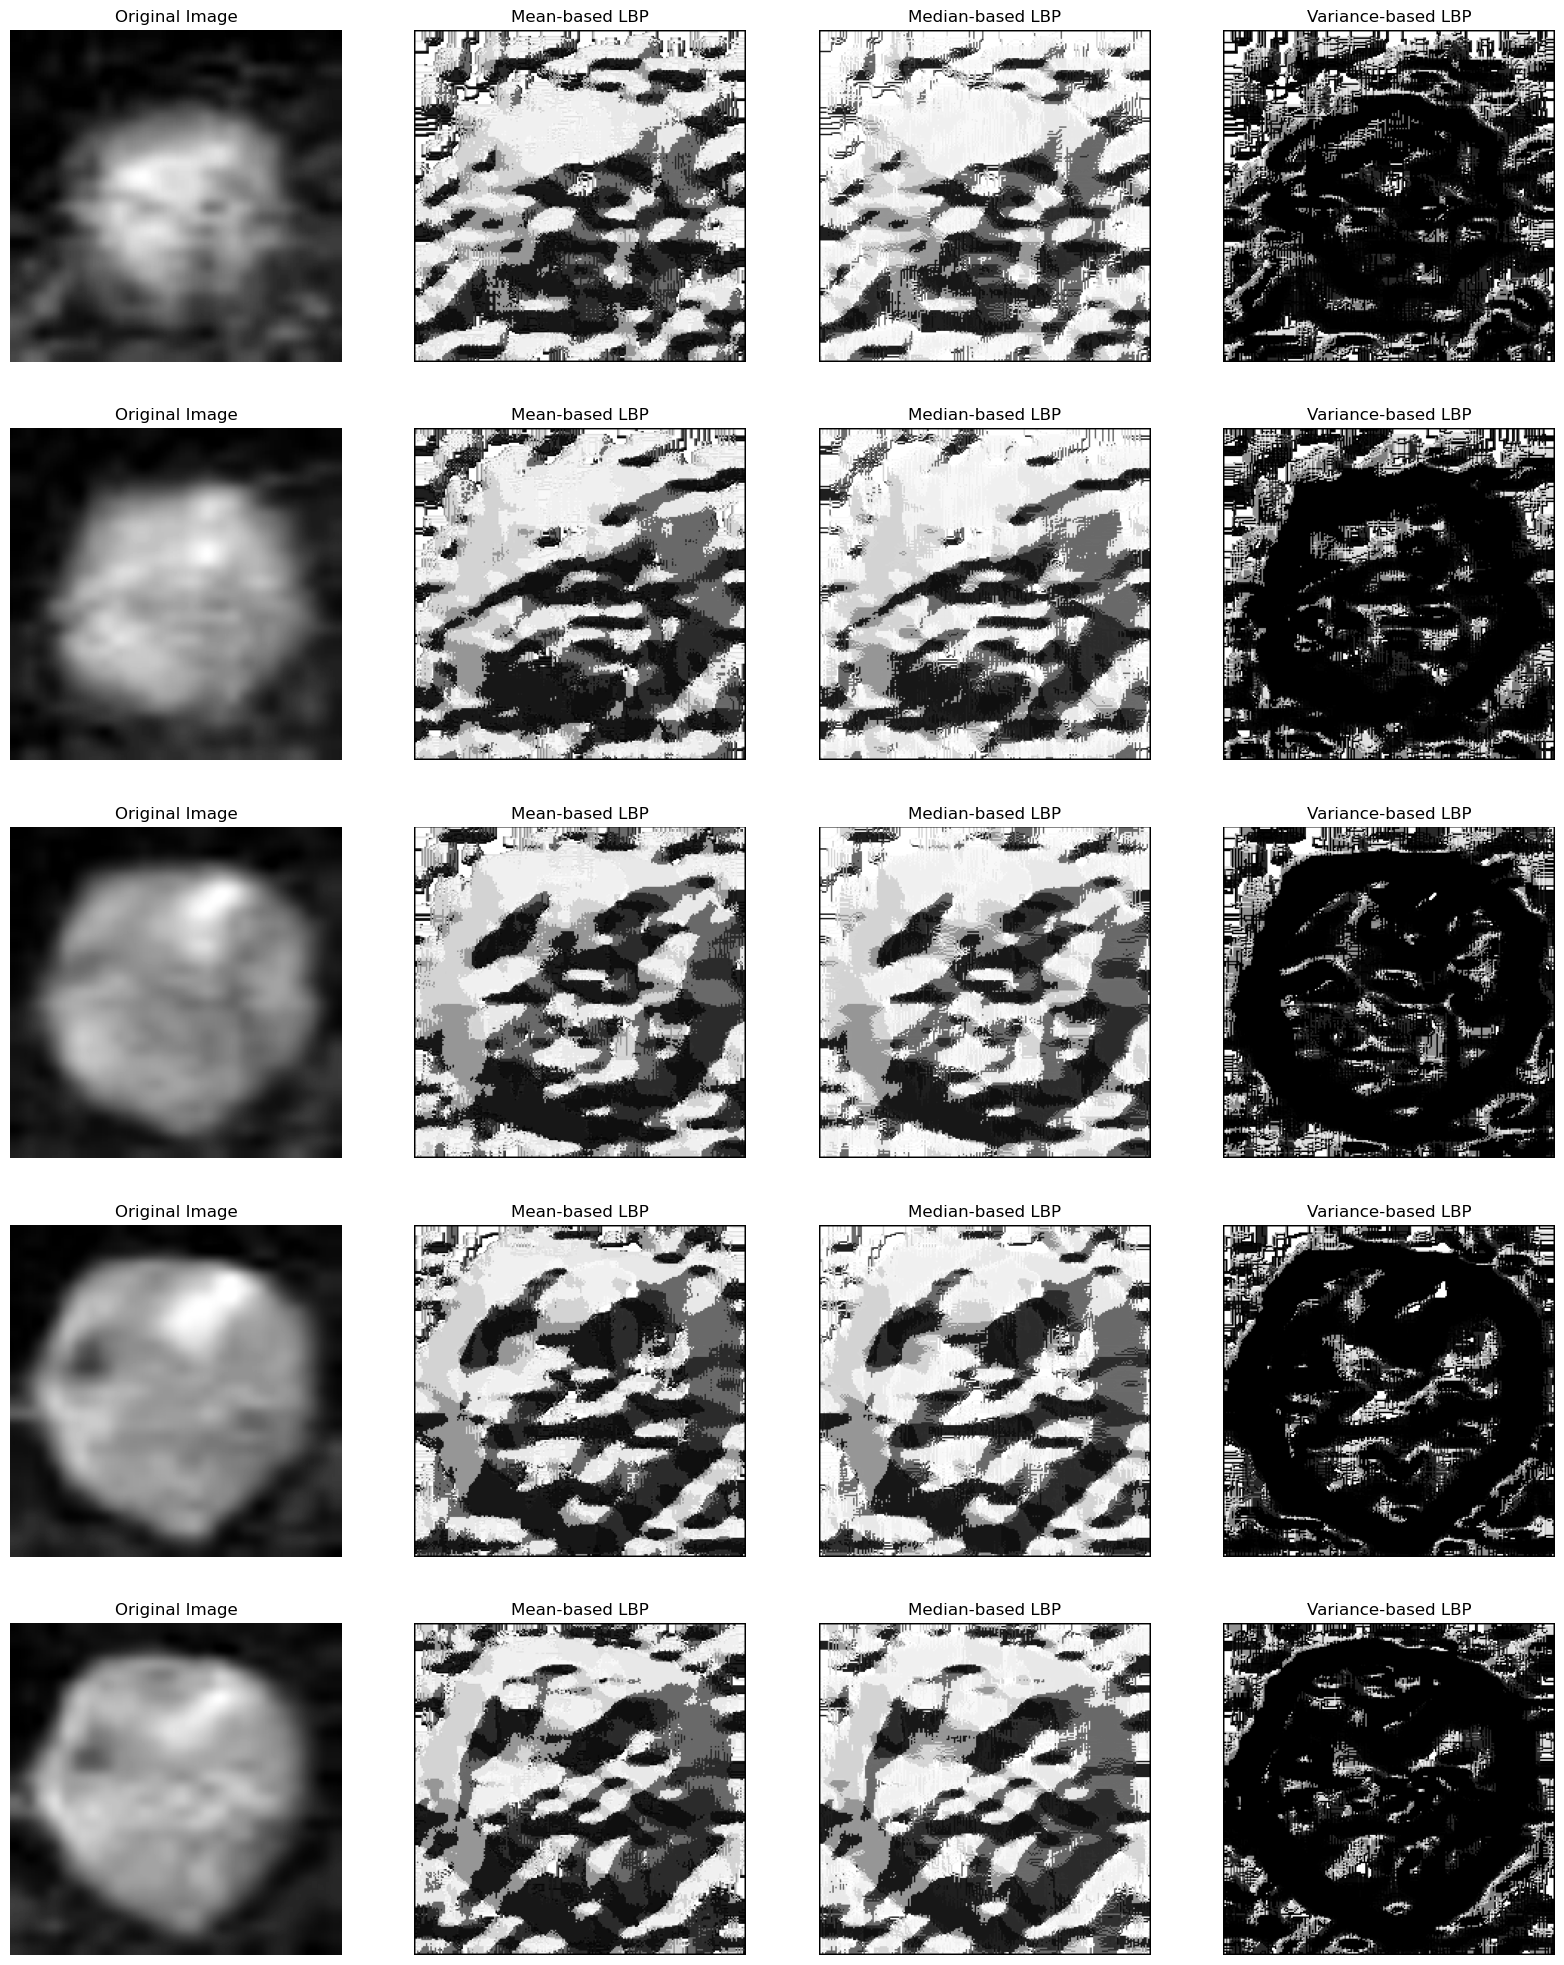

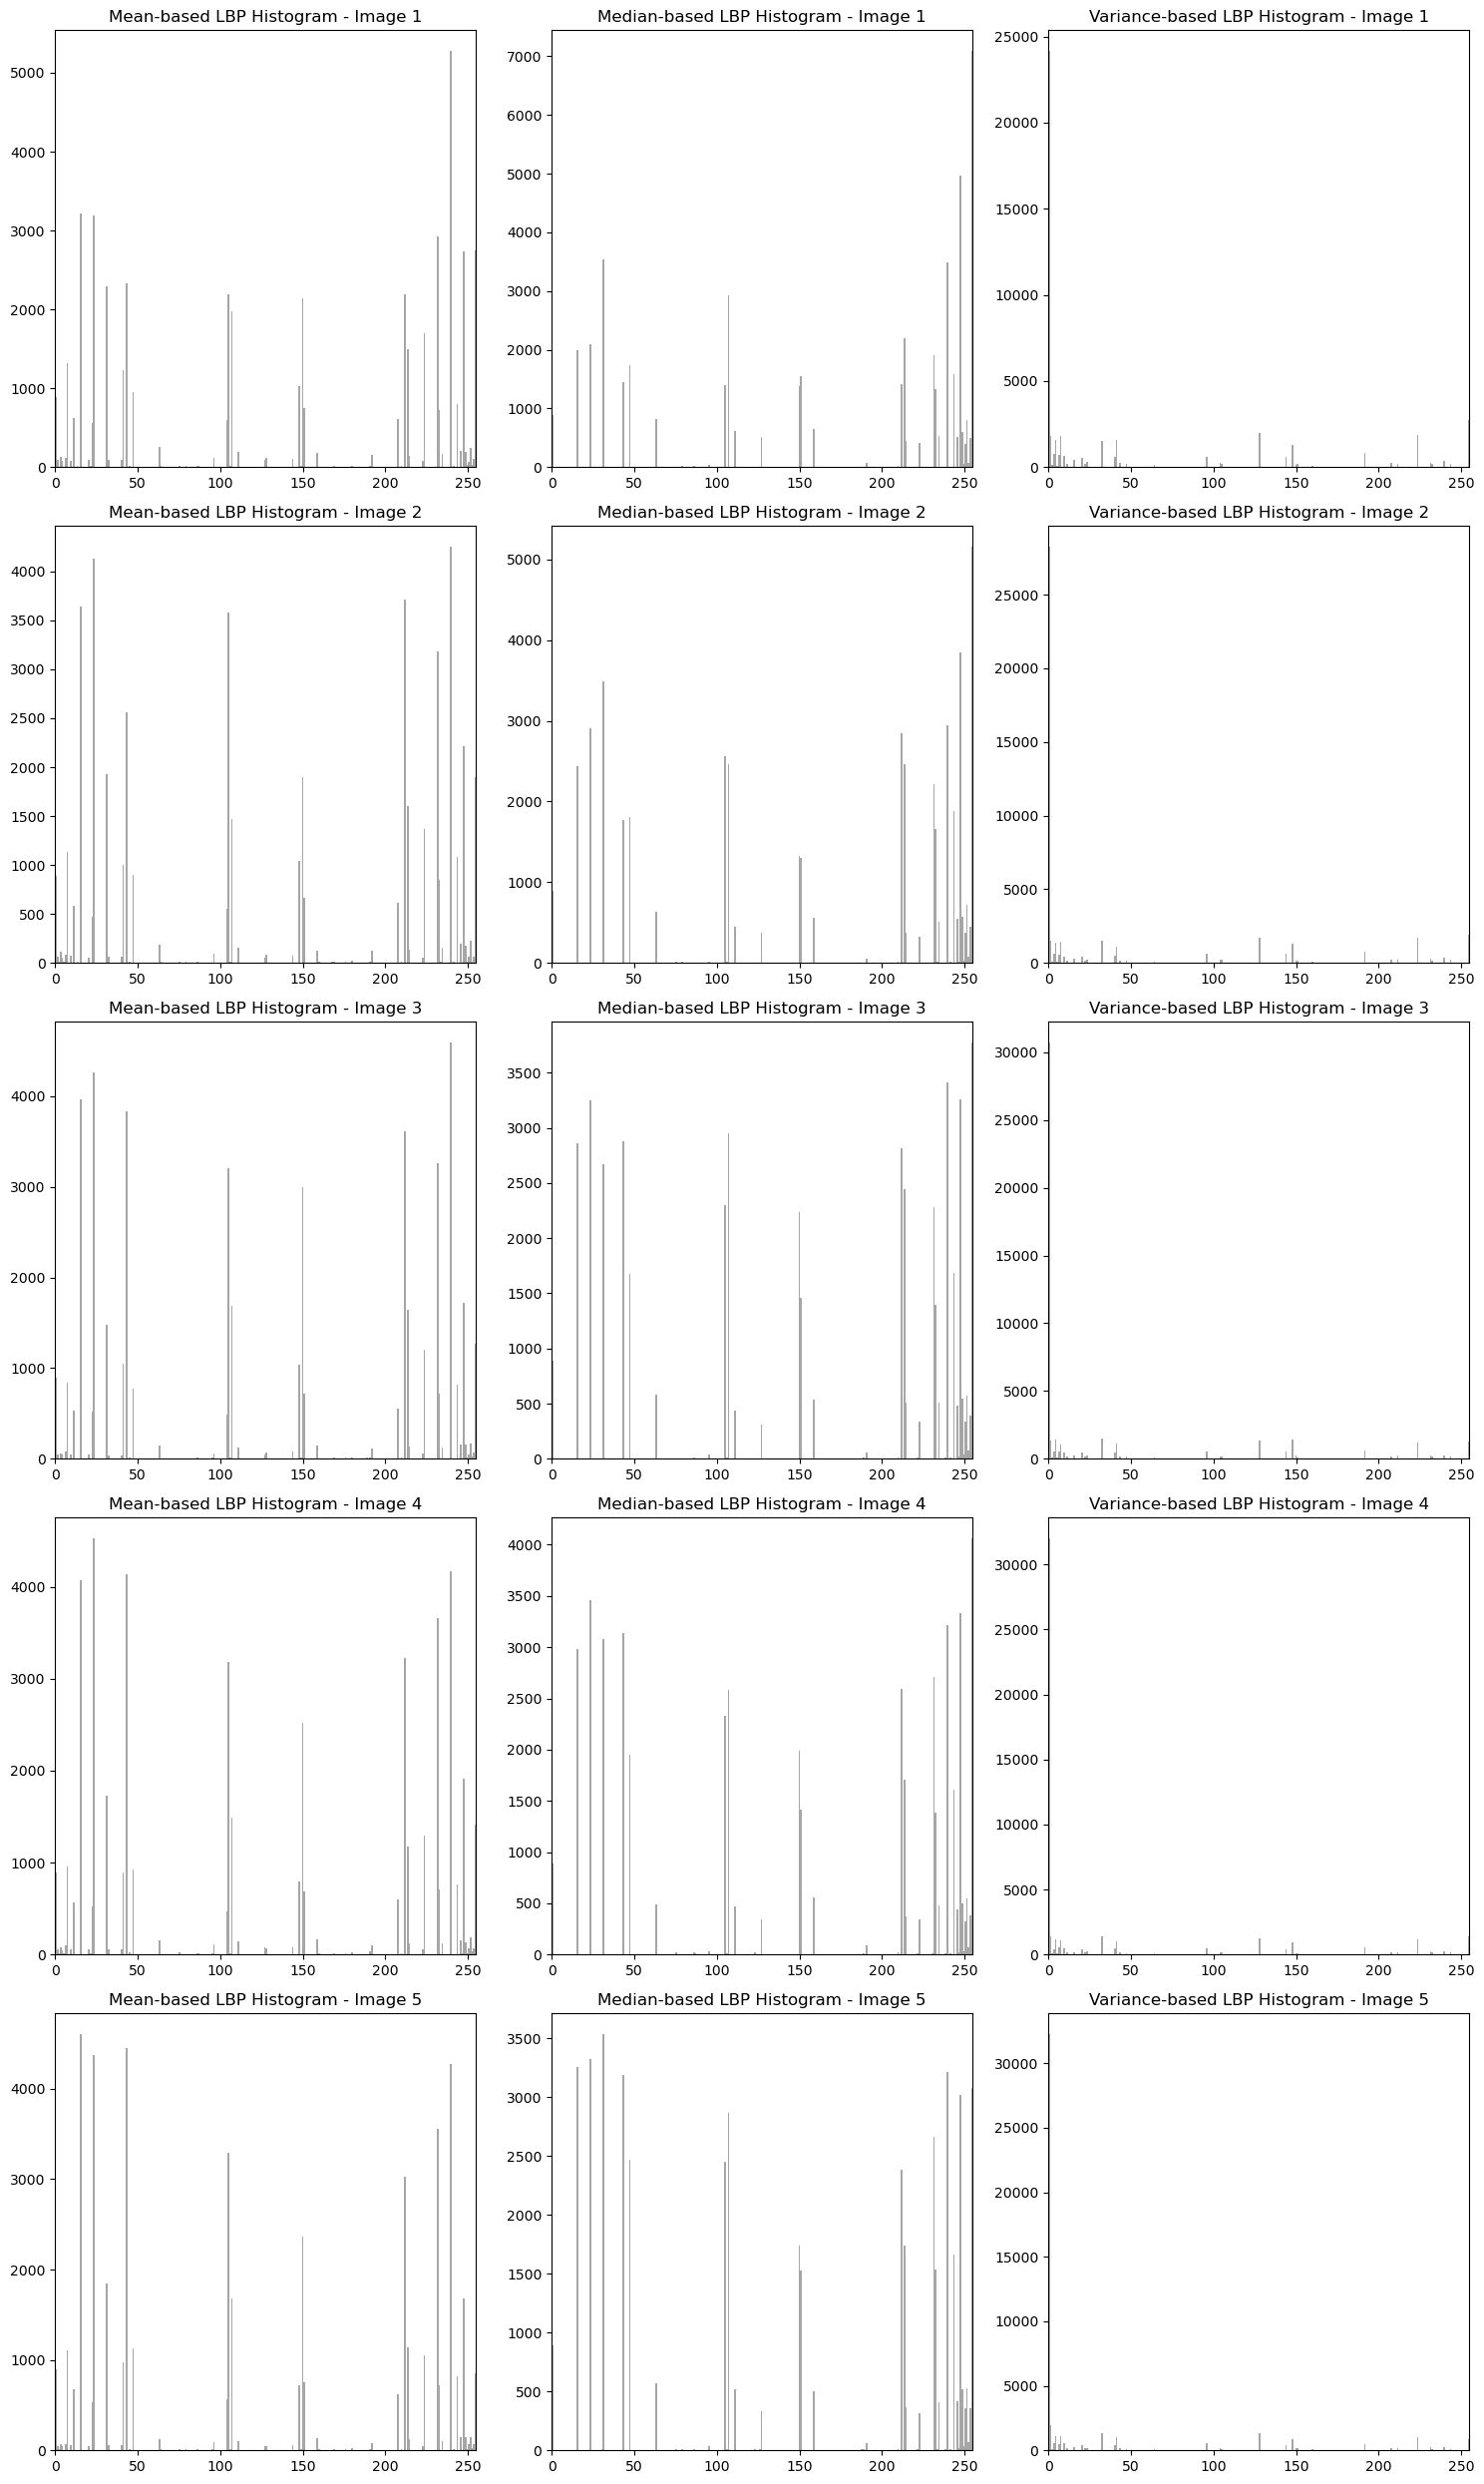

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def mean_based_lbp(img_array):
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            mean_value = (np.sum(neighborhood) - center_pixel) / 8
            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= mean_value).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()
    
    return lbp_image

def median_based_lbp(img_array):
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            median_value = np.median(neighborhood)
            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= median_value).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()
    
    return lbp_image

def variance_based_lbp(img_array):
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            variance_value = np.var(neighborhood)
            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= center_pixel + variance_value).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()
    
    return lbp_image

def plot_images_and_histograms(images):
    num_images = len(images)
    fig, axes = plt.subplots(num_images, 4, figsize=(20, num_images * 5))

    for index, image_path in enumerate(images):
        image = Image.open(image_path).convert('L').resize((224, 224))
        img_array = np.array(image)

        mean_lbp = mean_based_lbp(img_array)
        median_lbp = median_based_lbp(img_array)
        variance_lbp = variance_based_lbp(img_array)

        mean_lbp_normalized = (mean_lbp / mean_lbp.max()) * 255
        median_lbp_normalized = (median_lbp / median_lbp.max()) * 255
        variance_lbp_normalized = (variance_lbp / variance_lbp.max()) * 255

        axes[index, 0].imshow(img_array, cmap='gray')
        axes[index, 0].set_title('Original Image')
        axes[index, 0].axis('off')

        axes[index, 1].imshow(mean_lbp_normalized, cmap='gray')
        axes[index, 1].set_title('Mean-based LBP')
        axes[index, 1].axis('off')

        axes[index, 2].imshow(median_lbp_normalized, cmap='gray')
        axes[index, 2].set_title('Median-based LBP')
        axes[index, 2].axis('off')

        axes[index, 3].imshow(variance_lbp_normalized, cmap='gray')
        axes[index, 3].set_title('Variance-based LBP')
        axes[index, 3].axis('off')

    fig_hist, axes_hist = plt.subplots(num_images, 3, figsize=(15, num_images * 5))
    
    for index, image_path in enumerate(images):
        image = Image.open(image_path).convert('L').resize((224, 224))
        img_array = np.array(image)

        mean_lbp = mean_based_lbp(img_array)
        median_lbp = median_based_lbp(img_array)
        variance_lbp = variance_based_lbp(img_array)

        axes_hist[index, 0].hist(mean_lbp.ravel(), bins=256, color='gray', alpha=0.7)
        axes_hist[index, 0].set_title(f'Mean-based LBP Histogram - Image {index + 1}')
        axes_hist[index, 0].set_xlim([0, 255])

        axes_hist[index, 1].hist(median_lbp.ravel(), bins=256, color='gray', alpha=0.7)
        axes_hist[index, 1].set_title(f'Median-based LBP Histogram - Image {index + 1}')
        axes_hist[index, 1].set_xlim([0, 255])

        axes_hist[index, 2].hist(variance_lbp.ravel(), bins=256, color='gray', alpha=0.7)
        axes_hist[index, 2].set_title(f'Variance-based LBP Histogram - Image {index + 1}')
        axes_hist[index, 2].set_xlim([0, 255])

    plt.tight_layout()
    plt.show()

image_paths = [
    './clasification-roi/test/Benign/BreaDM-Be-1906/SUB1/p-010.jpg',
    './clasification-roi/test/Benign/BreaDM-Be-1906/SUB1/p-011.jpg',
    './clasification-roi/test/Benign/BreaDM-Be-1906/SUB1/p-012.jpg',
    './clasification-roi/test/Benign/BreaDM-Be-1906/SUB1/p-013.jpg',
    './clasification-roi/test/Benign/BreaDM-Be-1906/SUB1/p-014.jpg'
]

plot_images_and_histograms(image_paths)
